In [1]:
import pandas as pd

df = pd.read_csv("C:/all projects/BDML/backend/dataset/emails.csv/emails.csv")

In [2]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
len(df)

5728

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df["text"], df["spam"], test_size=0.2,)

In [5]:
len(x_train),len(y_train),len(x_test),len(y_test)

(4582, 4582, 1146, 1146)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vector = TfidfVectorizer()  

x_train = vector.fit_transform(x_train)

In [7]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=10)

model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


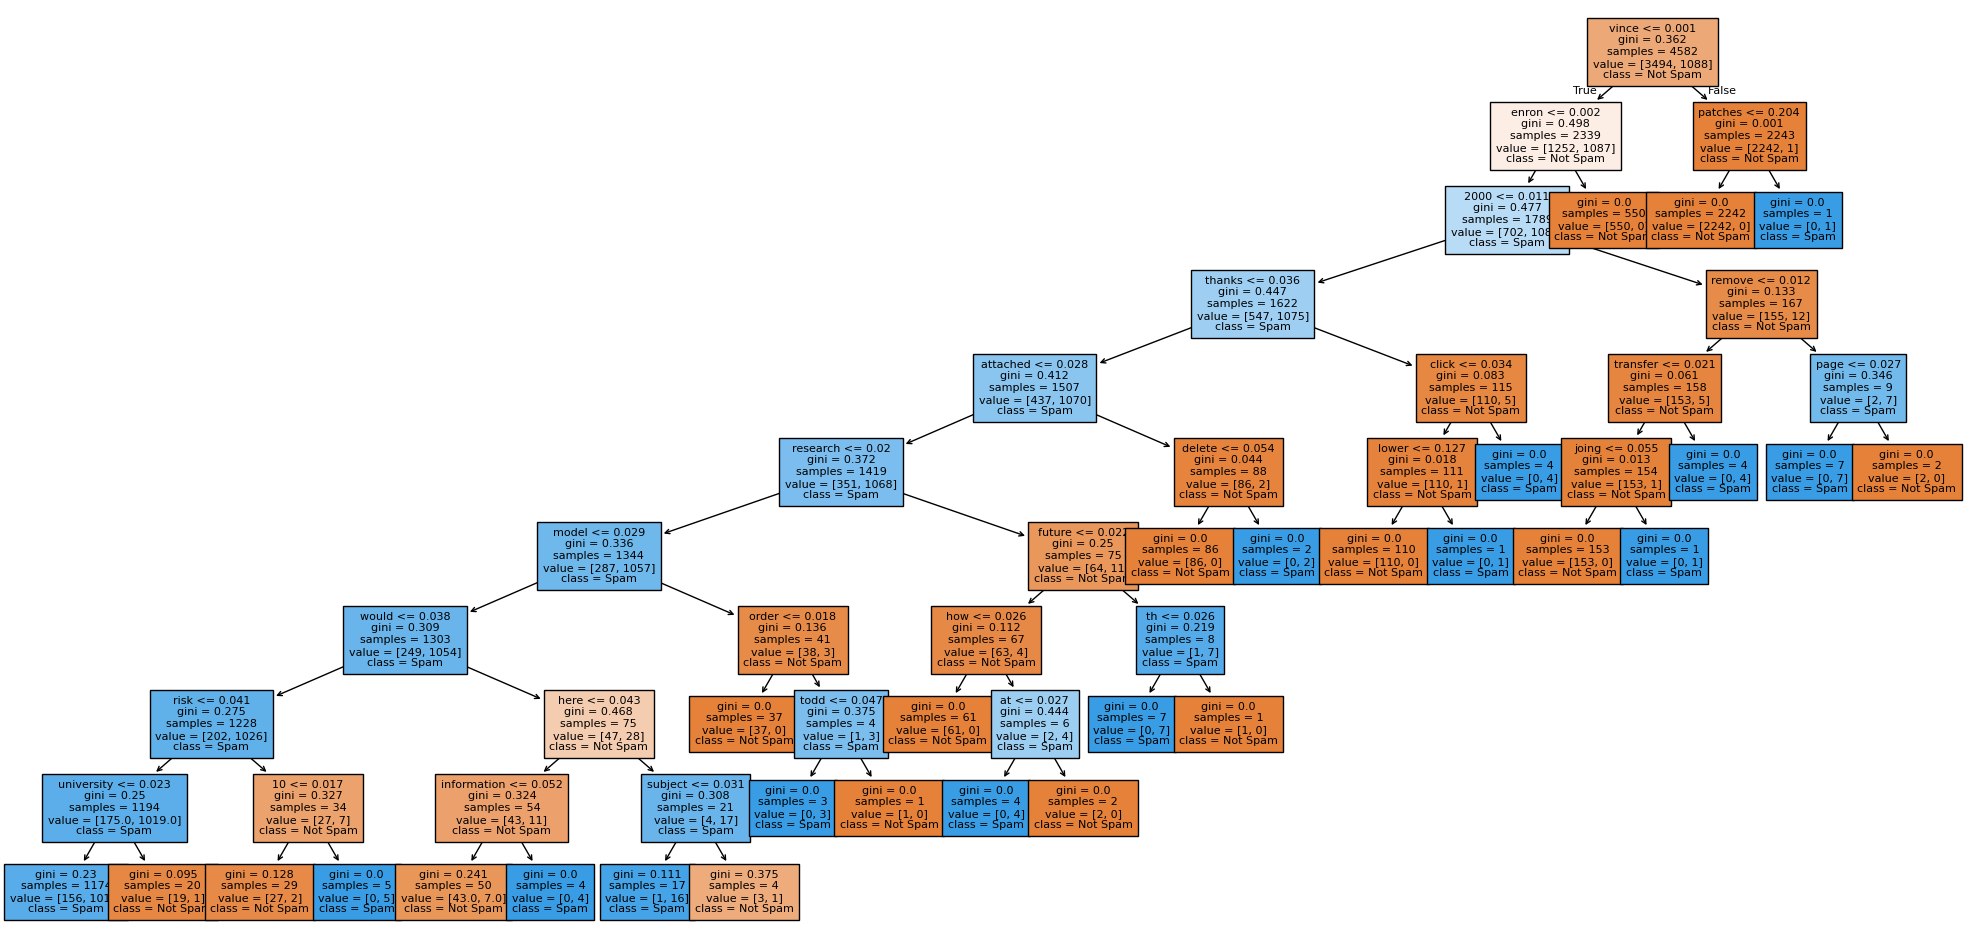

In [8]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 12))
plot_tree(
    model,
    filled=True,
    feature_names=vector.get_feature_names_out(),
    class_names=['Not Spam', 'Spam'],
    fontsize=8
)
plt.show()


In [9]:
from sklearn.metrics import accuracy_score

x_test = vector.transform(x_test)

y_pred = model.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9397905759162304


In [ ]:
import joblib

joblib.dump(model, "weights/spam_detection_model.pkl")
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [15]:
joblib.dump(vector, "weights/dec_vectorizer.pkl")

['weights/dec_vectorizer.pkl']

In [19]:
decision_tree_model = joblib.load("C:/all projects/BDML/backend/model/weights/spam_detection_model.pkl")

In [ ]:
acc = accuracy_score(y_test, decision_tree_model.predict(x_test))
print("Accuracy:", acc)

Accuracy: 0.9397905759162304


In [33]:
df["text"][5723]

'Subject: re : research and development charges to gpg  here it is !  - - - - - - - - - - - - - - - - - - - - - - forwarded by shirley crenshaw / hou / ect on 08 / 14 / 2000  07 : 47 am - - - - - - - - - - - - - - - - - - - - - - - - - - -  vince j kaminski  08 / 10 / 2000 02 : 25 pm  to : vera apodaca / et & s / enron @ enron  cc : vince j kaminski / hou / ect @ ect , shirley crenshaw / hou / ect @ ect , pinnamaneni  krishnarao / hou / ect @ ect  subject : re : research and development charges to gpg  vera ,  we shall talk to the accounting group about the correction .  vince  08 / 09 / 2000 03 : 26 pm  vera apodaca @ enron  vera apodaca @ enron  vera apodaca @ enron  08 / 09 / 2000 03 : 26 pm  08 / 09 / 2000 03 : 26 pm  to : pinnamaneni krishnarao / hou / ect @ ect  cc : vince j kaminski / hou / ect @ ect  subject : research and development charges to gpg  per mail dated june 15 from kim watson , there was supposed to have occurred  a true - up of $ 274 . 7 in july for the fist six m

In [32]:
df["spam"][5723]

np.int64(0)